# Transfer Learning


## imports and data processing:


In [23]:
# !gdown 11LQILlalZGi_skLIipnpTyh-At77B_j6 --output ../data/landmarks.zip
# !unzip ../data/landmarks.zip -d ../data/landmarks

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#os manipulation imports:
import os
import glob
import random


# tensorflow imports
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras

plt.style.use('dark_background')
plt.rcParams['axes.prop_cycle'] = plt.cycler(color = sns.color_palette('dark'))
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (20 , 15)

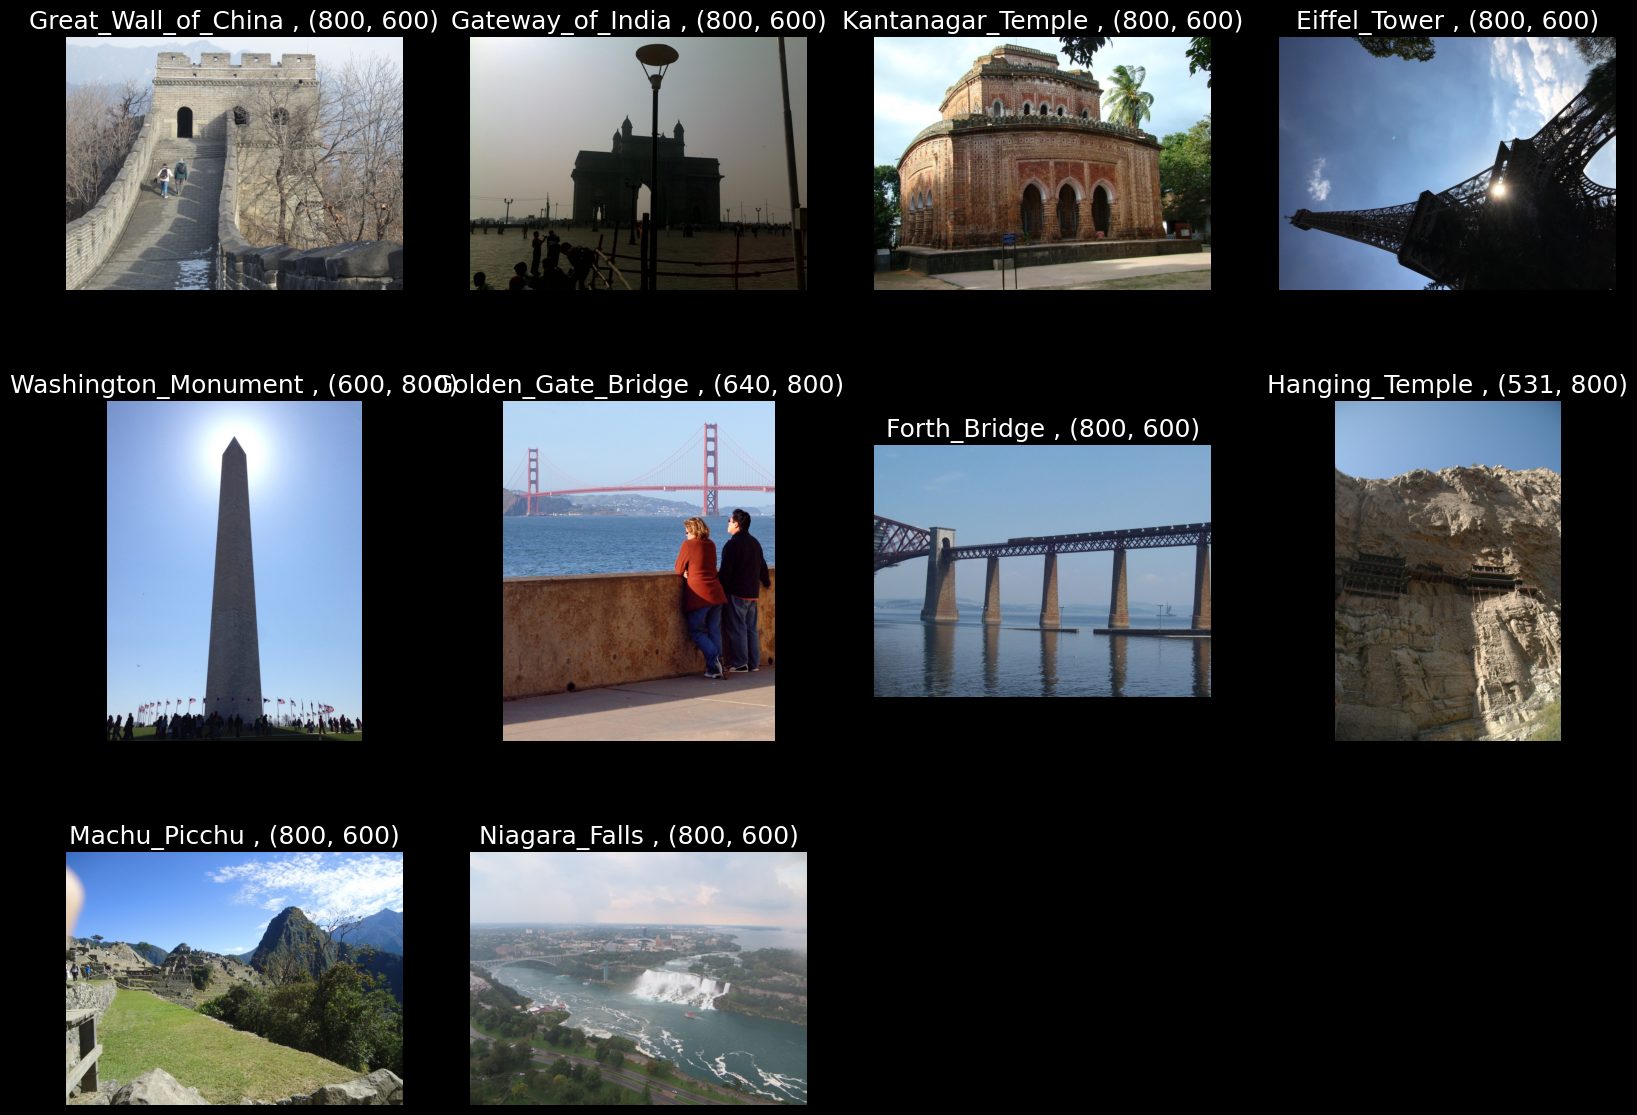

{'Great_Wall_of_China': 72,
 'Gateway_of_India': 87,
 'Kantanagar_Temple': 88,
 'Eiffel_Tower': 64,
 'Washington_Monument': 83,
 'Golden_Gate_Bridge': 70,
 'Forth_Bridge': 82,
 'Hanging_Temple': 70,
 'Machu_Picchu': 55,
 'Niagara_Falls': 66}

In [43]:
#visualize random images from each class from trainset:
traindir = '../data/landmarks/New_landmark_images/train'
classCounts = {}
classImages = {}
classdirs = os.listdir(traindir)
for cdir in classdirs:
    files = glob.glob(f"{traindir}/{cdir}/*")
    # print(files)
    classCounts[cdir[3:]] = len(files)
    rimage = np.random.choice(files)
    classImages[cdir[3:]] = tf.keras.utils.load_img(rimage)


for i , (cls , image) in enumerate(classImages.items()):
    plt.subplot(3 , 4, i + 1)

    plt.imshow(image)
    plt.title(f"{cls} , {image.size}")
    plt.axis('off')

plt.show()

classCounts

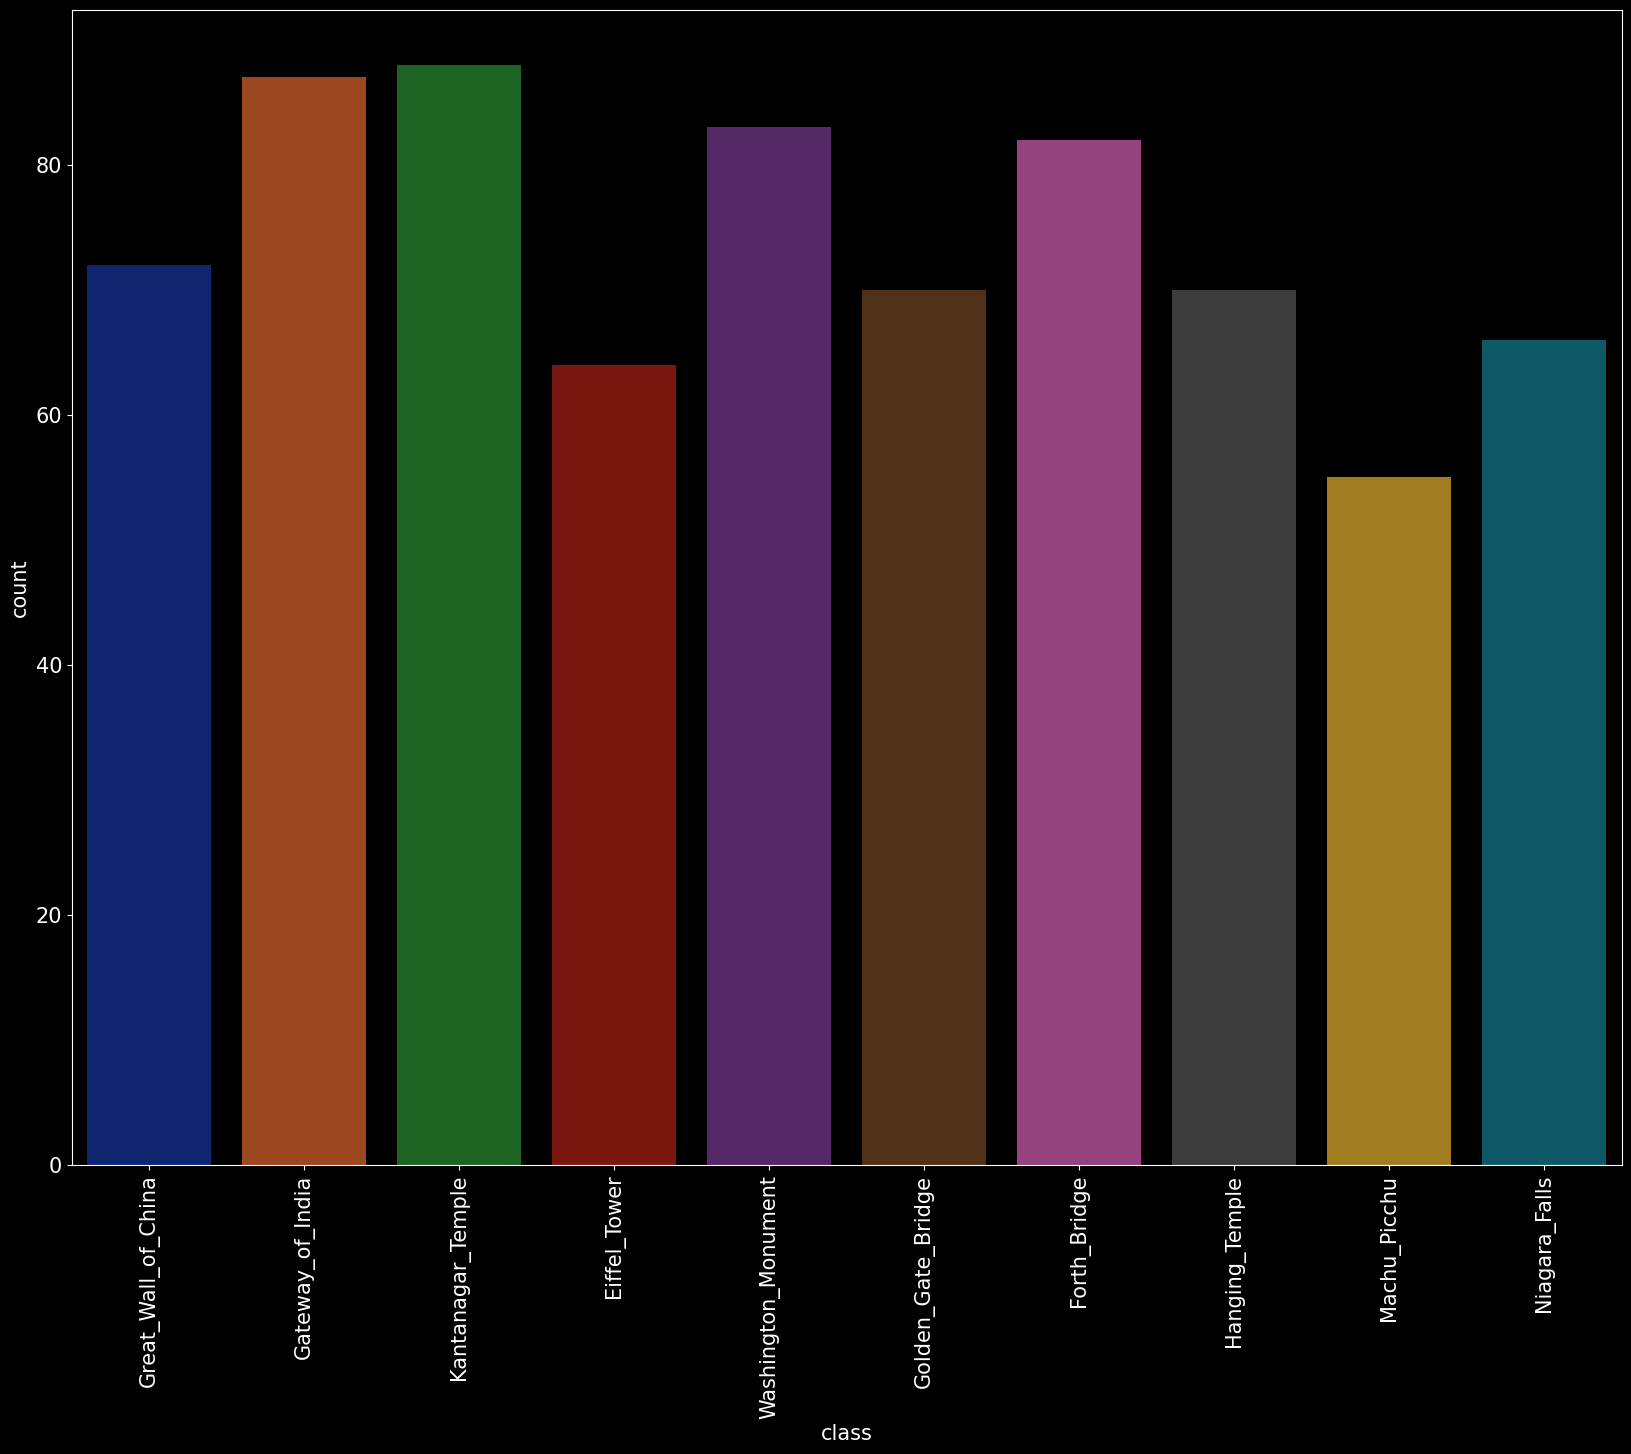

In [42]:
cdf = pd.DataFrame({
    'class': classCounts.keys(),
    'count': classCounts.values()
})
sns.barplot(data = cdf , x = 'class' , y = 'count' , hue = 'class')
plt.xticks(rotation = 90)
plt.show()

In [44]:
BATCH_SIZE = 128
tf.random.set_seed(10)
np.random.seed(10)
datadir = '../data/landmarks/New_landmark_images'
traindataset = tf.keras.utils.image_dataset_from_directory(datadir + '/train', shuffle = True , seed = 123 , image_size = (224 , 224) , batch_size = BATCH_SIZE)

validationdataset = tf.keras.utils.image_dataset_from_directory(datadir + '/validation' , shuffle = False , seed = 123 , image_size = (224 , 224) , batch_size= BATCH_SIZE)

testdataset = tf.keras.utils.image_dataset_from_directory(datadir + '/test' , shuffle = False , seed = 123 , image_size = (224 , 224) , batch_size= BATCH_SIZE)

data_preprocess = tf.keras.Sequential(
    name = 'data_preprocess',
    layers = [
        layers.Rescaling(1.0/255)
    ]
)

traindata = traindataset.map(lambda x , y : (data_preprocess(x) , y))
validationdata = validationdataset.map(lambda x , y : (data_preprocess(x) , y))
testdata = testdataset.map(lambda x , y: (data_preprocess(x) , y))

Found 737 files belonging to 10 classes.
Found 155 files belonging to 10 classes.
Found 43 files belonging to 10 classes.


In [47]:
lenet_model = tf.keras.Sequential(
    name = 'lenet_model',
    layers = [
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Conv2D(6, kernel_size=(5,5),
                        activation= 'sigmoid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides= (2,2)),
    tf.keras.layers.Conv2D(16, kernel_size=(5,5),
                        activation= 'sigmoid'),
    tf.keras.layers.AveragePooling2D(pool_size=(2,2), strides= (2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation= 'sigmoid'),
    tf.keras.layers.Dense(84, activation= 'sigmoid'),
    tf.keras.layers.Dense(10, activation= 'softmax'),

])
lenet_model.summary()

Model: "lenet_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_4             │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_5             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
#load pre-trainded model:
premodel = tf.keras.applications.VGG16(weights = 'imagenet' , include_top= False , input_shape = [224 , 224 , 3])
premodel.trainable = False
for i , layer in enumerate(premodel.layers):
    print(i , layer.name , layer.__class__.__name__ , 'trainable = ' , layer.trainable)
premodel.summary()

0 input_layer_5 InputLayer trainable =  False
1 block1_conv1 Conv2D trainable =  False
2 block1_conv2 Conv2D trainable =  False
3 block1_pool MaxPooling2D trainable =  False
4 block2_conv1 Conv2D trainable =  False
5 block2_conv2 Conv2D trainable =  False
6 block2_pool MaxPooling2D trainable =  False
7 block3_conv1 Conv2D trainable =  False
8 block3_conv2 Conv2D trainable =  False
9 block3_conv3 Conv2D trainable =  False
10 block3_pool MaxPooling2D trainable =  False
11 block4_conv1 Conv2D trainable =  False
12 block4_conv2 Conv2D trainable =  False
13 block4_conv3 Conv2D trainable =  False
14 block4_pool MaxPooling2D trainable =  False
15 block5_conv1 Conv2D trainable =  False
16 block5_conv2 Conv2D trainable =  False
17 block5_conv3 Conv2D trainable =  False
18 block5_pool MaxPooling2D trainable =  False


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [52]:
myvgg = tf.keras.Sequential(
    name = 'myvgg' , 
    layers = [
        premodel,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10 , activation = 'softmax')
    ]
)
for i , layer in enumerate(myvgg.layers):
    print(f"{i} , {layer.__class__.__name__} , trainable = {layer.trainable}")
myvgg.summary()

0 , Functional , trainable = False
1 , Flatten , trainable = True
2 , Dense , trainable = True


Model: "myvgg"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │       250,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,965,578 (57.09 MB)

 Trainable params: 250,890 (980.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [61]:
def compileTrain(model , traindata , validationdata , epochs = 10 , cpath = './models/myvgg.keras'):
    callbacks = [
        keras.callbacks.ReduceLROnPlateau(
            monitor="val_loss", factor=0.3, patience=5, min_lr=0.00001
        ),
        # keras.callbacks.ModelCheckpoint('./models', save_weights_only=True, monitor='val_accuracy', mode='max', save_best_only=True),
        keras.callbacks.EarlyStopping(
            monitor="val_loss", patience=10, min_delta=0.001, mode='min'
        )
    ]

    model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])
    hist = model.fit(traindata , validation_data = validationdata , epochs = epochs , callbacks = callbacks)
    model.save(cpath)
    return hist

In [64]:
def plot_metrics(history , metrics = ['accuracy' , 'loss' , 'learning_rate']):
    fig , ax = plt.subplots( 1 , len(metrics) ,figsize = (10 * len(metrics) , 8))

    for i , metric in enumerate(metrics):
        ax[i].plot(history.history[metric] , label = metric)
        ax[i].tick_params(axis = 'x' , labelsize = 15)
        ax[i].tick_params(axis = 'y' , labelsize = 15)

        if 'val_'+metric in history.history:
            ax[i].plot(history.history['val_'+metric], label = 'val_'+metric)
        ax[i].legend(fontsize = 15)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 53s 9s/step - accuracy: 1.0000 - loss: 0.0081 - val_accuracy: 0.7935 - val_loss: 0.6556 - learning_rate: 0.0010
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 8s/step - accuracy: 0.9971 - loss: 0.0095 - val_accuracy: 0.8452 - val_loss: 0.6303 - learning_rate: 0.0010
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 49s 8s/step - accuracy: 1.0000 - loss: 0.0032 - val_accuracy: 0.8516 - val_loss: 0.4260 - learning_rate: 0.0010
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 9s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.8903 - val_loss: 0.4255 - learning_rate: 0.0010
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 48s 8s/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8516 - val_loss: 0.4899 - learning_rate: 0.0010


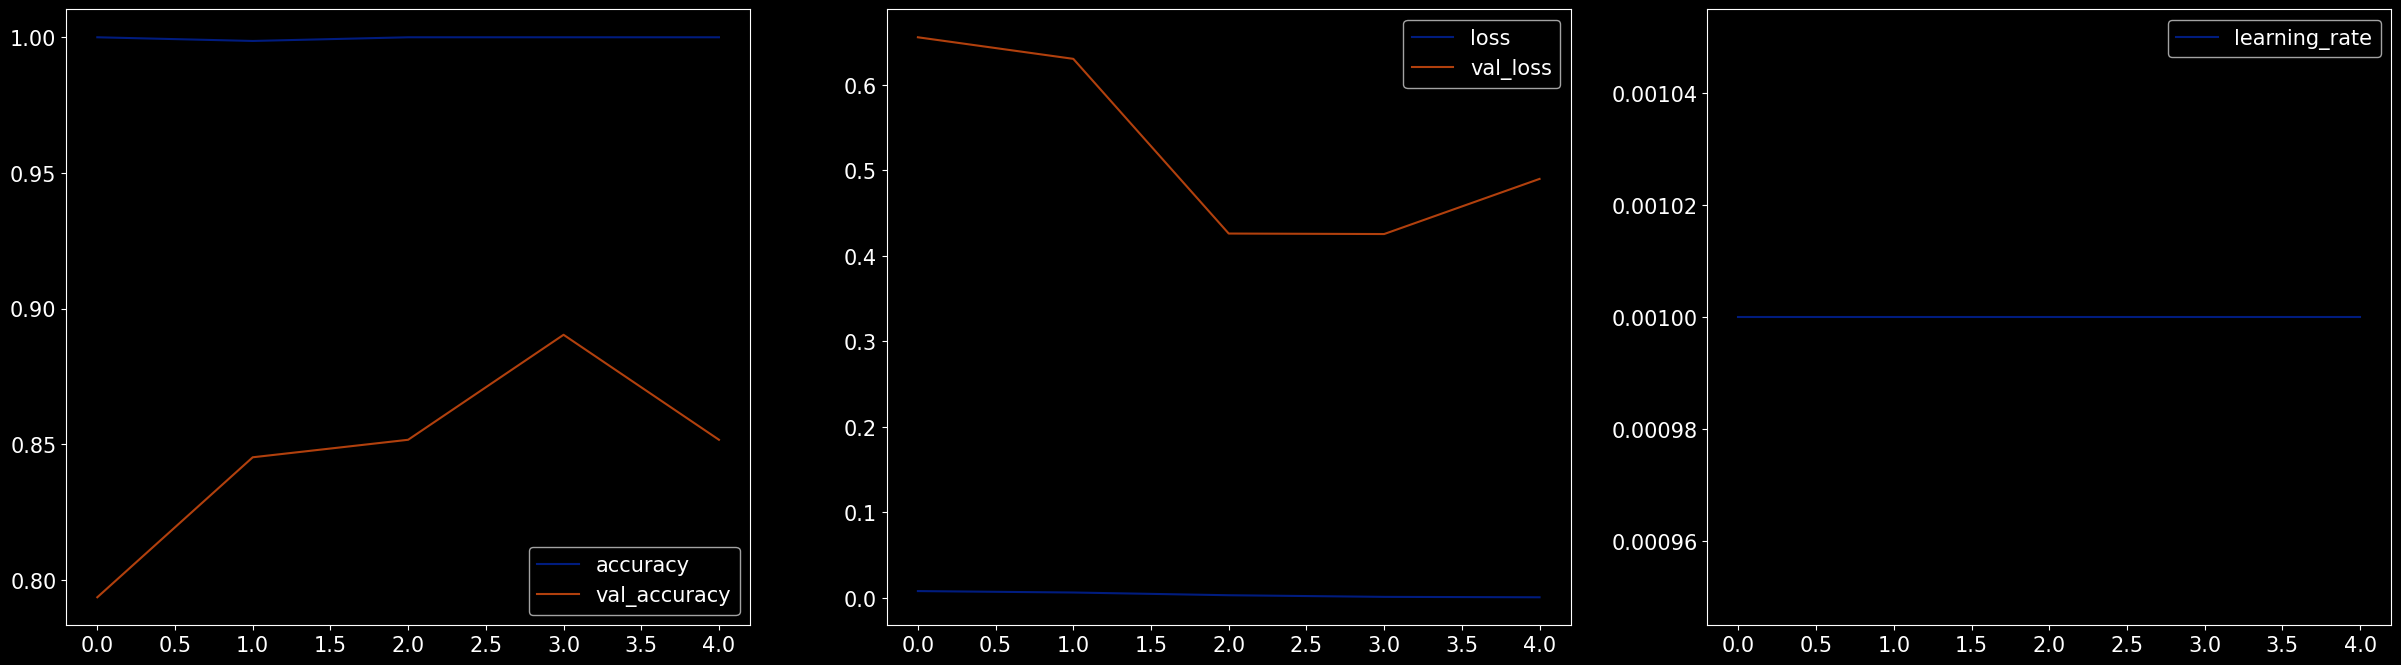

In [69]:
# tf.keras.backend.clear_session()
vgghist = compileTrain(myvgg , traindata , validationdata , epochs = 5)
plot_metrics(vgghist)